<a href="https://colab.research.google.com/github/dhanavel2021/RF-Classifier/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
data=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/Social_Network_Ads.csv')

In [6]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [7]:
data1=pd.get_dummies(data)
data1
data1.drop(['User ID'],axis=1)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
 4   Gender_Female    400 non-null    uint8  
 5   Gender_Male      400 non-null    uint8  
dtypes: float64(2), int64(2), uint8(2)
memory usage: 13.4 KB


In [9]:
x=data1.drop(['Purchased'],axis=1).values
y=data1['Purchased'].values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
s=StandardScaler()

In [38]:
x_transform=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [39]:
c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
c.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
p=c.predict(x_test)

In [41]:
c.predict_proba(x_test)

array([[0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [42]:
accuracy_score(y_test,p)

0.75

In [43]:
z=classification_report(y_test,p)
print(z)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        45
           1       0.00      0.00      0.00        15

    accuracy                           0.75        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.56      0.75      0.64        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
z=classification_report(y_test,p)
print(z)

array([[45,  0],
       [15,  0]])

In [45]:
from sklearn.metrics import roc_curve

In [46]:
from sklearn.metrics import roc_auc_score,auc

In [47]:

y_proba=c.predict_proba(x_test)
y_predicted=y_proba[:,1]

In [48]:
print(y_predicted)

[0.2 0.  0.2 0.  0.  0.2 0.  0.2 0.  0.2 0.2 0.  0.2 0.2 0.2 0.  0.2 0.2
 0.  0.2 0.  0.  0.  0.2 0.  0.  0.  0.2 0.  0.  0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.  0.  0.  0.2 0.2 0.  0.2 0.  0.  0.  0.  0.2 0.2 0.  0.  0.  0.2
 0.  0.2 0.  0.  0.2 0.2]


In [49]:
fpr,tpr,thresholds=roc_curve(y_test,y_predicted)

In [50]:
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.4777777777777778


Text(0, 0.5, 'True Positive Rate(sensitivity')

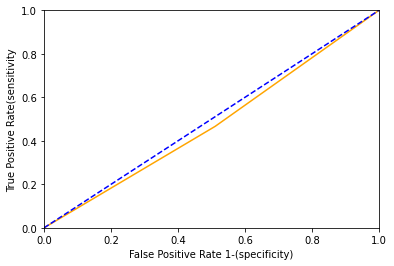

In [51]:
plt.figure()
plt.plot(fpr,tpr,color='orange',label='ROC'%roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate 1-(specificity)')
plt.ylabel('True Positive Rate(sensitivity')